In [ ]:
#Import all necessary libraries which are useful for Preprocessing the images,training the model,visualise the results

import tensorflow as tf
import PIL
import os
from keras.preprocessing.image import ImageDataGenerator
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop 
import PIL
import seaborn as sns
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import cv2

In [ ]:
#Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #Now we import the images from drive folder and create train folder which contains 3662 images and 
#label folder which has 3662 values of different categories 0,1,2,3,4 
    

train=[]
label=[]
count0=0
count1=0
count2=0
count3=0
count4=0
for i in os.listdir(r'/content/drive/MyDrive/Blindness/train'):
    
     trainsetfolder = os.listdir(os.path.join(r'/content/drive/MyDrive/Blindness/train',i))
     for j in trainsetfolder:
          i1 = '/content/drive/MyDrive/Blindness/train'
          img = os.path.join(i1,i,j)
          #img = cv2.imread(img)
          #im_size = (224,224)
          #img = cv2.resize(img,im_size)
          if(i == '0'):
            count0 = count0 + 1
          elif(i == '1'):
            count1 = count1 + 1
          elif(i == '2'):
            count2 = count2 + 1
          elif(i == '3'):
            count3 = count3 + 1
          else:
            count4 = count4 + 1
          train.append(img)
          label.append(i) 
trainimagescount=[]
print("length of training:"+str(len(train)))
for i in range(5):
   if(i == 0):
     print("0 category images are "+str(count0))
     trainimagescount.append(str(count0))
   elif(i == 1):
     print("1 category images are "+str(count1))
     trainimagescount.append(str(count1))
   elif(i == 2):
     print("2 category images are "+str(count2))
     trainimagescount.append(str(count2))
   elif(i == 3):
     print("3 category images are "+str(count3))
     trainimagescount.append(str(count3))
   else:
     print("4 category images are "+str(count4))
     trainimagescount.append(str(count4))

 

length of training:3662
0 category images are 1806
1 category images are 370
2 category images are 998
3 category images are 193
4 category images are 295


In [ ]:
#Printing the training set images path

train


['/content/drive/MyDrive/Blindness/train/2/00b74780d31d.png',
 '/content/drive/MyDrive/Blindness/train/2/00a8624548a9.png',
 '/content/drive/MyDrive/Blindness/train/2/00e4ddff966a.png',
 '/content/drive/MyDrive/Blindness/train/2/012a242ac6ff.png',
 '/content/drive/MyDrive/Blindness/train/2/0161338f53cc.png',
 '/content/drive/MyDrive/Blindness/train/2/0180bfa26c0b.png',
 '/content/drive/MyDrive/Blindness/train/2/01c7808d901d.png',
 '/content/drive/MyDrive/Blindness/train/2/01eb826f6467.png',
 '/content/drive/MyDrive/Blindness/train/2/025a169a0bb0.png',
 '/content/drive/MyDrive/Blindness/train/2/026dcd9af143.png',
 '/content/drive/MyDrive/Blindness/train/2/03676c71ed1b.png',
 '/content/drive/MyDrive/Blindness/train/2/033f2b43de6d.png',
 '/content/drive/MyDrive/Blindness/train/2/032d7b0b4bf6.png',
 '/content/drive/MyDrive/Blindness/train/2/03747397839f.png',
 '/content/drive/MyDrive/Blindness/train/2/0415fc68b176.png',
 '/content/drive/MyDrive/Blindness/train/2/03ff7d159f10.png',
 '/conte

In [ ]:
#All the labels assosciated to each of the images where labels are 0,1,2,3,4

label

['2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


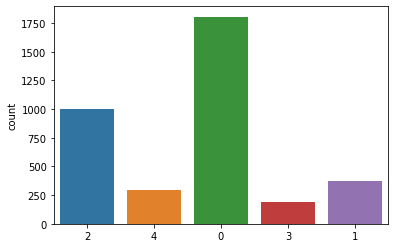

In [ ]:
#Bar chart representaion of dataset distribution to five different classes

sns.countplot(label)


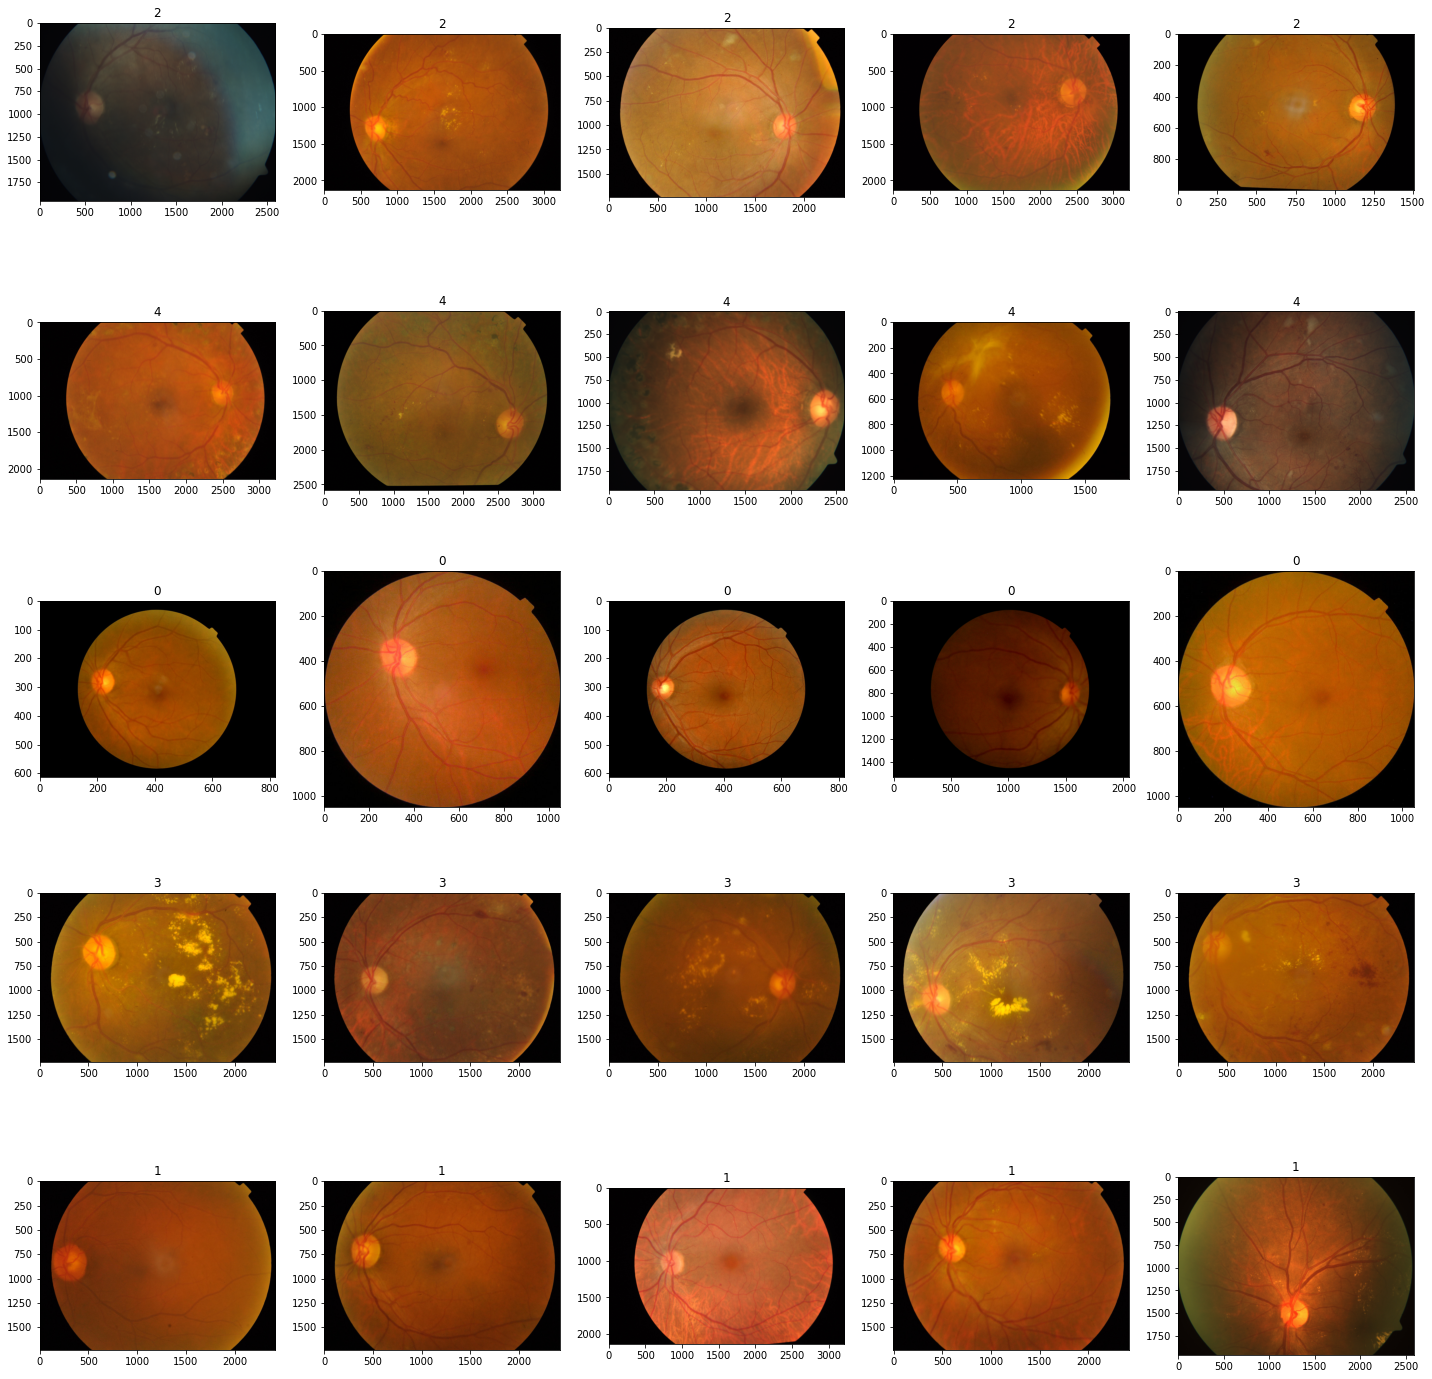

In [ ]:
#We view the images in each of five category.Below is sample visualization of 5 images in each of the 5 categories

fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('/content/drive/MyDrive/Blindness/train'):
  # get the list of images in a given class
  path = '/content/drive/MyDrive/Blindness/train'
  train_class = os.listdir(os.path.join(path, i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join(path, i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()

['1806', '370', '998', '193', '295']


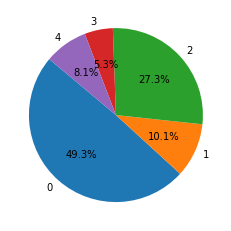

In [ ]:
#Pie chart representaion of dataset distribution to five different classes

figureObject, axesObject = plt.subplots()
print(trainimagescount)
labels=[0,1,2,3,4]
axesObject.pie(trainimagescount,
                labels=labels,autopct='%1.1f%%',startangle=140)


 

plt.show()

In [ ]:
#Creating a dataframe with two columns images (path) and label assosciated to it

retina_df = pd.DataFrame({'Image': train,'Labels':label})
retina_df

,Image,Labels
0,/content/drive/MyDrive/Blindness/train/2/00b74...,2
1,/content/drive/MyDrive/Blindness/train/2/00a86...,2
2,/content/drive/MyDrive/Blindness/train/2/00e4d...,2
3,/content/drive/MyDrive/Blindness/train/2/012a2...,2
4,/content/drive/MyDrive/Blindness/train/2/01613...,2
...,...,...
3657,/content/drive/MyDrive/Blindness/train/1/fe2df...,1
3658,/content/drive/MyDrive/Blindness/train/1/fdd18...,1
3659,/content/drive/MyDrive/Blindness/train/1/fea14...,1
3660,/content/drive/MyDrive/Blindness/train/1/fe674...,1


In [ ]:
#Splitting the dataset into 80% data into training set , 20% data into testing set

retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [ ]:
#After splitting we have 2929 images in training set

train

,Image,Labels
3302,/content/drive/MyDrive/Blindness/train/1/06b71...,1
2361,/content/drive/MyDrive/Blindness/train/0/0afbe...,0
1714,/content/drive/MyDrive/Blindness/train/0/aecce...,0
1308,/content/drive/MyDrive/Blindness/train/0/7aabd...,0
3249,/content/drive/MyDrive/Blindness/train/3/c3165...,3
...,...,...
234,/content/drive/MyDrive/Blindness/train/2/3a61e...,2
2415,/content/drive/MyDrive/Blindness/train/0/13d01...,0
414,/content/drive/MyDrive/Blindness/train/2/63c3c...,2
2129,/content/drive/MyDrive/Blindness/train/0/e9faf...,0


In [ ]:
#After splitting we have 733 images in testing set

test

,Image,Labels
585,/content/drive/MyDrive/Blindness/train/2/94dcb...,2
2377,/content/drive/MyDrive/Blindness/train/0/0d8f6...,0
2191,/content/drive/MyDrive/Blindness/train/0/f2336...,0
1175,/content/drive/MyDrive/Blindness/train/4/94ef1...,4
360,/content/drive/MyDrive/Blindness/train/2/547b3...,2
...,...,...
1896,/content/drive/MyDrive/Blindness/train/0/ca05f...,0
1713,/content/drive/MyDrive/Blindness/train/0/af345...,0
56,/content/drive/MyDrive/Blindness/train/2/0fcfc...,2
657,/content/drive/MyDrive/Blindness/train/2/a45d7...,2


In [ ]:
#Here we crop the images to eliminate any unneccessary data
def crop_image_from_gray(img, tol=7):
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0):
            return img
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img
IMG_WIDTH = 224
IMG_HEIGHT = 224

#Here we preprocess the image to invoke crop_image function,to resize the images according to CNN architecture

def preprocess_image(image, sigmaX=10):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = cv2.addWeighted (image,4, cv2.GaussianBlur(image, (0,0) ,sigmaX), -4, 128)
    return image

In [ ]:
#Now we create ImageDataGenerator class for Training set and testing set by randomly flippping the images,rotating and 
#applying preprocesssing by cropping the images
#We create validation set which is 15% of 85% training images

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        preprocessing_function=preprocess_image,
        zoom_range=0.2,
        validation_split
        =0.15,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Now we instantiate the train_generator,validation_generator,test_generator which are used for model training and testing
#The image size for resnet50 algorithm is 224,224
#After all the generators are created, we get 2490 training images belonging to five different categories
#439 validation images belonging to five different categories, 733 testing images belonging to five different categories
train_generator = train_datagen.flow_from_dataframe(
train,
directory='/content/drive/MyDrive/Blindness',
x_col="Image",
y_col="Labels",
target_size=(224, 224),
color_mode="rgb",
class_mode="categorical",
batch_size=32,
subset='training')


validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='/content/drive/MyDrive/Blindness',
    x_col="Image",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='/content/drive/MyDrive/Blindness',
    x_col="Image",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)



Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [ ]:
##Here we are using Transfer learning approach and we instantiate Resnet50 instance which is pretrained on 
#Imagenet dataset

num_classes=5
model = Sequential()
model.add(ResNet50(include_top = False, pooling = "avg",
                   weights = "imagenet"))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))

model.layers[0].trainable = True

model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_12 (Dense)             (None, 128)               262272    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 325       
Total params: 23,858,565
Trainable params: 23,805,445
Non-trainable params: 53,120
_____________________________________

In [ ]:
#Adding model checkpoints to save the best weights to the given folder path
#Adding early stopping by monitoring the val_loss with patience 20

checkPoint = ModelCheckpoint(
    filepath='',
    verbose=1,
    save_best_only=True,
)
earlyStopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    mode='min'
)

Epoch 1/50
77/77 [==============================] - 360s 5s/step - loss: 4.5667 - accuracy: 0.3141 - val_loss: 1.6234 - val_accuracy: 0.1178
Epoch 2/50
77/77 [==============================] - 351s 5s/step - loss: 3.4021 - accuracy: 0.4987 - val_loss: 1.3784 - val_accuracy: 0.5312
Epoch 3/50
77/77 [==============================] - 348s 5s/step - loss: 3.1312 - accuracy: 0.5707 - val_loss: 1.3125 - val_accuracy: 0.5361
Epoch 4/50
77/77 [==============================] - 354s 5s/step - loss: 2.8582 - accuracy: 0.5866 - val_loss: 1.5484 - val_accuracy: 0.2716
Epoch 5/50
77/77 [==============================] - 350s 5s/step - loss: 2.8202 - accuracy: 0.6092 - val_loss: 1.3623 - val_accuracy: 0.5433
Epoch 6/50
77/77 [==============================] - 353s 5s/step - loss: 2.7474 - accuracy: 0.6498 - val_loss: 1.3382 - val_accuracy: 0.5312
Epoch 7/50
77/77 [==============================] - 351s 5s/step - loss: 2.6523 - accuracy: 0.6543 - val_loss: 1.2753 - val_accuracy: 0.5433
Epoch 8/50
77

'\nhistory = model.fit_generator(\n\t\ttrain_generator,\n\t\tepochs = 20,\n\t\tsteps_per_epoch = train_generator.n // 32,\n\t\tvalidation_data = validation_generator,\n\t\tvalidation_steps = validation_generator.n // 32,\n\t\tclass_weight = class_weights)'

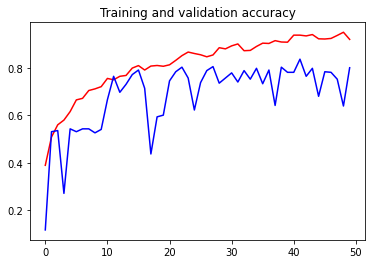

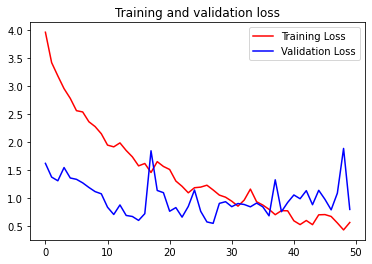

In [ ]:
#Training the model
"""""Accuracy plots are also printed after training finishes"""

history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 50, validation_data= validation_generator, 
                    validation_steps= validation_generator.n // 32, callbacks=[checkPoint, earlyStopping])

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
#print('accuracy'+str(acc))
epochs = range(len(acc)) 
  
plt.plot(epochs, acc, 'r', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy') 
  
plt.figure() 
  
plt.plot(epochs, loss, 'r', label='Training Loss') 
plt.plot(epochs, val_loss, 'b', label='Validation Loss') 
plt.title('Training and validation loss') 
plt.legend() 

evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)



In [ ]:
#We are now predicting the accuracy of test set

evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)


22/22 [==============================] - 75s 3s/step - loss: 0.7641 - accuracy: 0.8068


In [ ]:

#Saving the trained model instance
from keras.models import load_model
model.save('/content/drive/MyDrive/resnet10thapril.h5') 



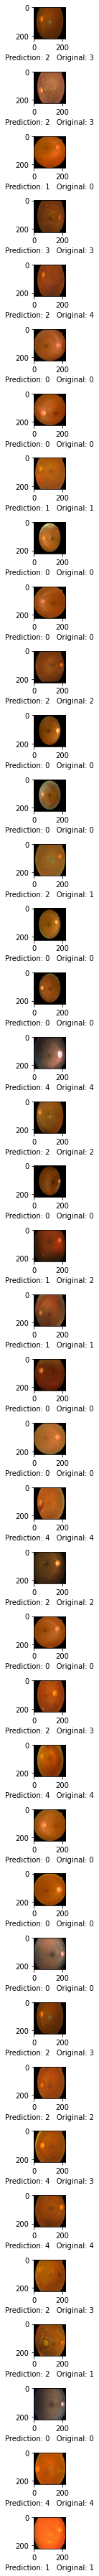

['2', '0', '0', '4', '2', '0', '4', '1', '2', '0', '0', '4', '0', '2', '0', '1', '0', '2', '2', '0', '1', '0', '2', '0', '0', '0', '4', '0', '0', '0', '1', '2', '0', '2', '0', '2', '0', '0', '0', '0', '4', '2', '4', '1', '0', '0', '4', '2', '0', '0', '2', '0', '0', '4', '0', '2', '0', '2', '2', '4', '2', '0', '0', '4', '2', '0', '1', '0', '2', '2', '0', '0', '0', '1', '0', '0', '2', '4', '2', '2', '2', '2', '0', '2', '0', '0', '0', '0', '1', '2', '1', '0', '0', '2', '0', '0', '0', '4', '4', '0', '4', '4', '0', '2', '2', '0', '0', '0', '0', '0', '0', '2', '0', '0', '2', '0', '2', '2', '0', '0', '2', '1', '0', '0', '0', '0', '2', '3', '0', '0', '1', '0', '0', '0', '1', '4', '0', '4', '2', '0', '2', '4', '4', '0', '0', '0', '0', '0', '2', '3', '0', '0', '2', '1', '0', '1', '0', '2', '0', '0', '2', '2', '0', '2', '2', '0', '0', '2', '4', '2', '1', '4', '0', '1', '0', '3', '0', '0', '0', '0', '0', '0', '0', '0', '4', '1', '2', '3', '0', '0', '2', '0', '0', '4', '3', '2', '4', '2', '2', '0',

In [ ]:
#We are visualizing the predicted results by showing the image and printing its original severity category and predicted 
#severity category

'''Visualizing the classification report on how well our model performed is printed below'''

from sklearn.metrics import classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  # resizing the image to (224,224)
  img = img.resize((224,224))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,224,224,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  #predict = predict.astype(str)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])

  import random
fig=plt.figure(figsize = (50,50))
for i in range(40):
    j = random.randint(0,len(image))
    fig.add_subplot(40, 1, i+1)
    plt.xlabel("Prediction: " + str(prediction[j]) +"   Original: " + str(original[j]))
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

prediction = [str(x) for x in prediction]
print(prediction)

print(classification_report(original,prediction))